In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import json
import random, string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
maindir = "D:/Blood/data" # Directory with files
traincsv = maindir+"/Update_train.csv"
testcsv = maindir+"/Updated_Test.csv"
cholesterol_signature = maindir + "/Useful Spectras - Cholesterol.csv"
hemoglobin_signature = maindir + "/Useful Spectras - Hemoglobin.csv"
glucose_signature = maindir + "/Useful Spectras - Glucose.csv"
skin_fat_blood_signature = maindir + "/Useful Spectras - skin_fat_blood.csv"

In [61]:
train = pd.read_csv(traincsv)
test = pd.read_csv(testcsv)

In [62]:
train.describe()


,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,id,std,temperature,humidity,donation_id
count,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,...,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000,29160.000000
mean,0.501233,0.505343,0.509430,0.513951,0.520390,0.527901,0.534790,0.539878,0.547992,0.560161,...,1.256808,1.250286,1.247337,1.261093,1.249279,18395.467078,0.007525,41.243166,35.340352,6647.707819
std,0.154276,0.114408,0.108543,0.131905,0.130735,0.127874,0.115413,0.122235,0.120122,0.121974,...,0.147095,0.157714,0.165125,0.172043,0.142374,11516.122819,0.004625,2.833117,8.700879,3036.003039
min,-2.793790,-1.875939,-1.733555,-2.270881,-2.239499,-2.172958,-1.870428,-2.021362,-1.963416,-1.990968,...,-1.399953,-1.618211,-1.746980,-1.840234,-0.995391,0.000000,0.002400,30.480000,16.610000,1975.000000
25%,0.486140,0.488110,0.491822,0.496990,0.502719,0.509847,0.516403,0.522104,0.530236,0.542101,...,1.209375,1.198047,1.191282,1.200460,1.187413,7289.750000,0.004500,39.180000,28.300000,3593.000000
50%,0.509431,0.511737,0.515532,0.521206,0.527353,0.534120,0.540330,0.546182,0.554205,0.567028,...,1.259995,1.253789,1.251885,1.264090,1.250164,21499.500000,0.006100,41.200000,35.295000,6428.500000
75%,0.530501,0.532439,0.536944,0.542858,0.549445,0.556553,0.563126,0.568506,0.576613,0.589161,...,1.313490,1.312229,1.311609,1.328095,1.314102,28789.250000,0.008900,43.130000,41.190000,9326.000000
max,0.657782,0.652291,0.659153,0.658982,0.659410,0.667296,0.672708,0.680601,0.691116,0.704255,...,1.606844,1.586301,1.657884,1.672314,1.738621,36079.000000,0.028700,52.690000,67.820000,11906.000000


In [5]:
features = pd.DataFrame(train).iloc[:,1:173]
targets = pd.DataFrame(train).iloc[:, 173:]

In [6]:
targets

,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ok,ok,ok
1,ok,high,high
2,ok,ok,high
3,low,ok,high
4,ok,ok,high
...,...,...,...
13135,high,ok,ok
13136,ok,ok,ok
13137,ok,ok,ok
13138,ok,ok,ok


In [5]:
corr_matrix = train.loc[:, features.columns].corr()
corr_matrix

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
absorbance0,1.000000,0.994335,0.993656,0.990729,0.986299,0.980789,0.980174,0.981815,0.981786,0.981279,...,0.487318,0.468849,0.429557,0.400194,0.370321,0.356716,0.367690,0.313837,-0.002262,-0.091021
absorbance1,0.994335,1.000000,0.995065,0.993688,0.989985,0.985200,0.984774,0.986153,0.986120,0.985308,...,0.482792,0.462445,0.420356,0.389091,0.358438,0.344585,0.355232,0.301865,-0.003022,-0.082088
absorbance2,0.993656,0.995065,1.000000,0.995264,0.992315,0.988484,0.988657,0.990028,0.989751,0.988703,...,0.485587,0.464608,0.422015,0.389889,0.358415,0.344238,0.355437,0.300949,-0.005960,-0.075002
absorbance3,0.990729,0.993688,0.995264,1.000000,0.996121,0.992685,0.992255,0.992732,0.991977,0.991087,...,0.467600,0.442978,0.395370,0.360794,0.328011,0.313567,0.325787,0.270254,-0.007929,-0.063665
absorbance4,0.986299,0.989985,0.992315,0.996121,1.000000,0.996601,0.995606,0.994500,0.992681,0.991022,...,0.459102,0.428612,0.375357,0.336719,0.301647,0.286692,0.300052,0.245189,-0.009484,-0.061729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
absorbance167,0.356716,0.344585,0.344238,0.313567,0.286692,0.280245,0.298026,0.325567,0.346928,0.358881,...,0.868491,0.914095,0.950091,0.965601,0.968994,1.000000,0.954550,0.934297,0.007357,-0.031885
absorbance168,0.367690,0.355232,0.355437,0.325787,0.300052,0.294897,0.312431,0.339367,0.359601,0.370675,...,0.856455,0.900877,0.936446,0.952213,0.956306,0.954550,1.000000,0.927440,0.011191,-0.042620
absorbance169,0.313837,0.301865,0.300949,0.270254,0.245189,0.241297,0.257783,0.283564,0.304460,0.313834,...,0.834478,0.877052,0.912490,0.928436,0.934443,0.934297,0.927440,1.000000,0.014722,-0.036316
temperature,-0.002262,-0.003022,-0.005960,-0.007929,-0.009484,-0.010241,-0.010055,-0.009488,-0.009175,-0.009304,...,-0.017006,-0.009327,-0.004280,0.001696,0.006607,0.007357,0.011191,0.014722,1.000000,-0.273798


In [34]:
[targets.iloc[:, i].value_counts() for i in range(3)]

[hdl_cholesterol_human
 ok      7500
 low     3060
 high    2580
 Name: count, dtype: int64,
 hemoglobin(hgb)_human
 ok      11700
 high      900
 low       540
 Name: count, dtype: int64,
 cholesterol_ldl_human
 ok      7320
 high    5220
 low      600
 Name: count, dtype: int64]

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = features

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,absorbance0,21006.309360
1,absorbance1,25717.235313
2,absorbance2,34533.313188
3,absorbance3,46755.426947
4,absorbance4,63412.329896
...,...,...
167,absorbance167,4209.093092
168,absorbance168,2668.952785
169,absorbance169,1673.868954
170,temperature,181.775459


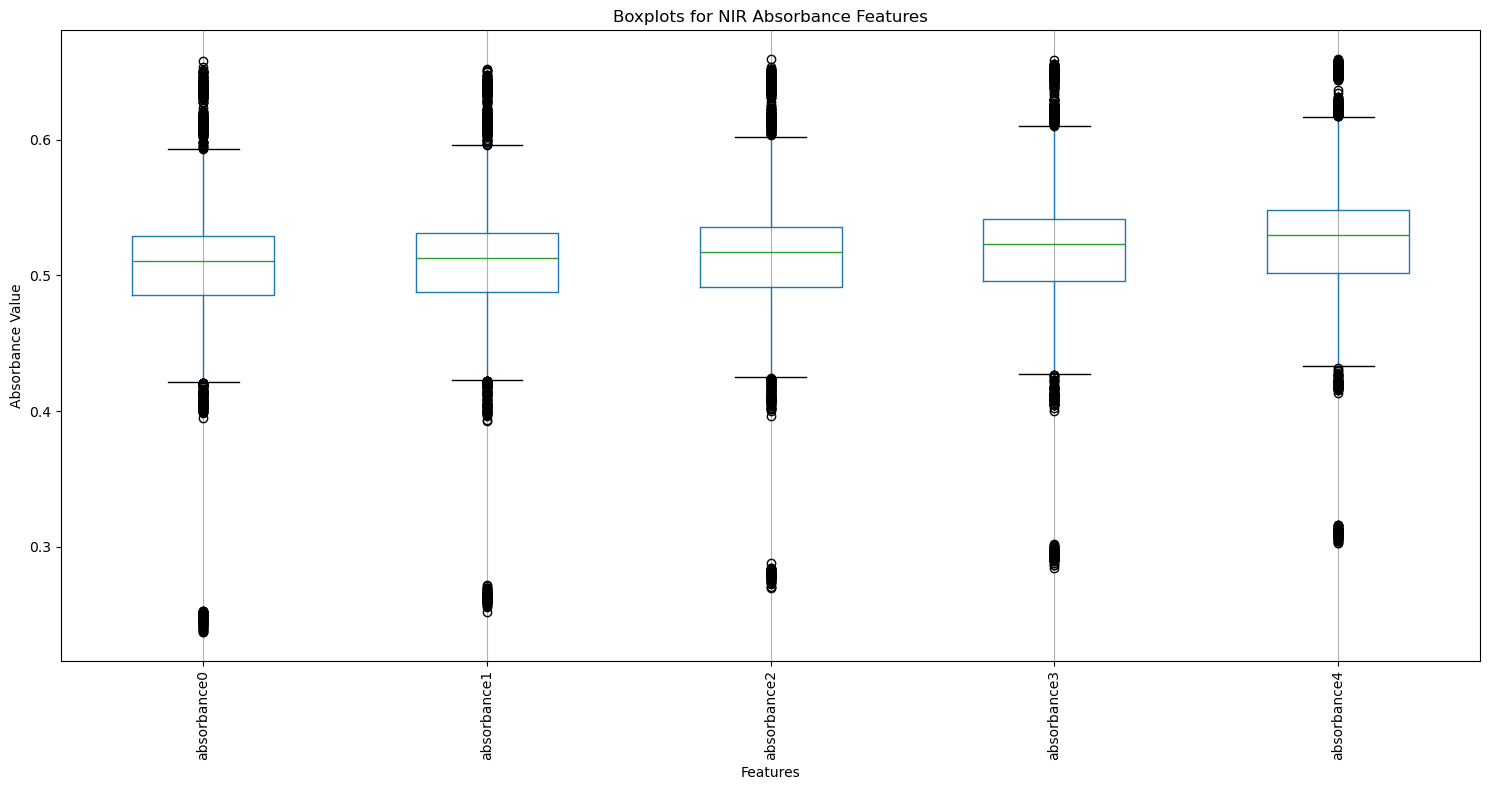

In [43]:
# Only the NIR absorbance columns
nir_columns = [col for col in features.columns[:5]]
nir_absorbance_data = features[nir_columns]

# Create boxplots for the selected NIR features
plt.figure(figsize=(15, 8))
nir_absorbance_data.boxplot(rot=90, showfliers=True)
plt.title("Boxplots for NIR Absorbance Features")
plt.ylabel("Absorbance Value")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


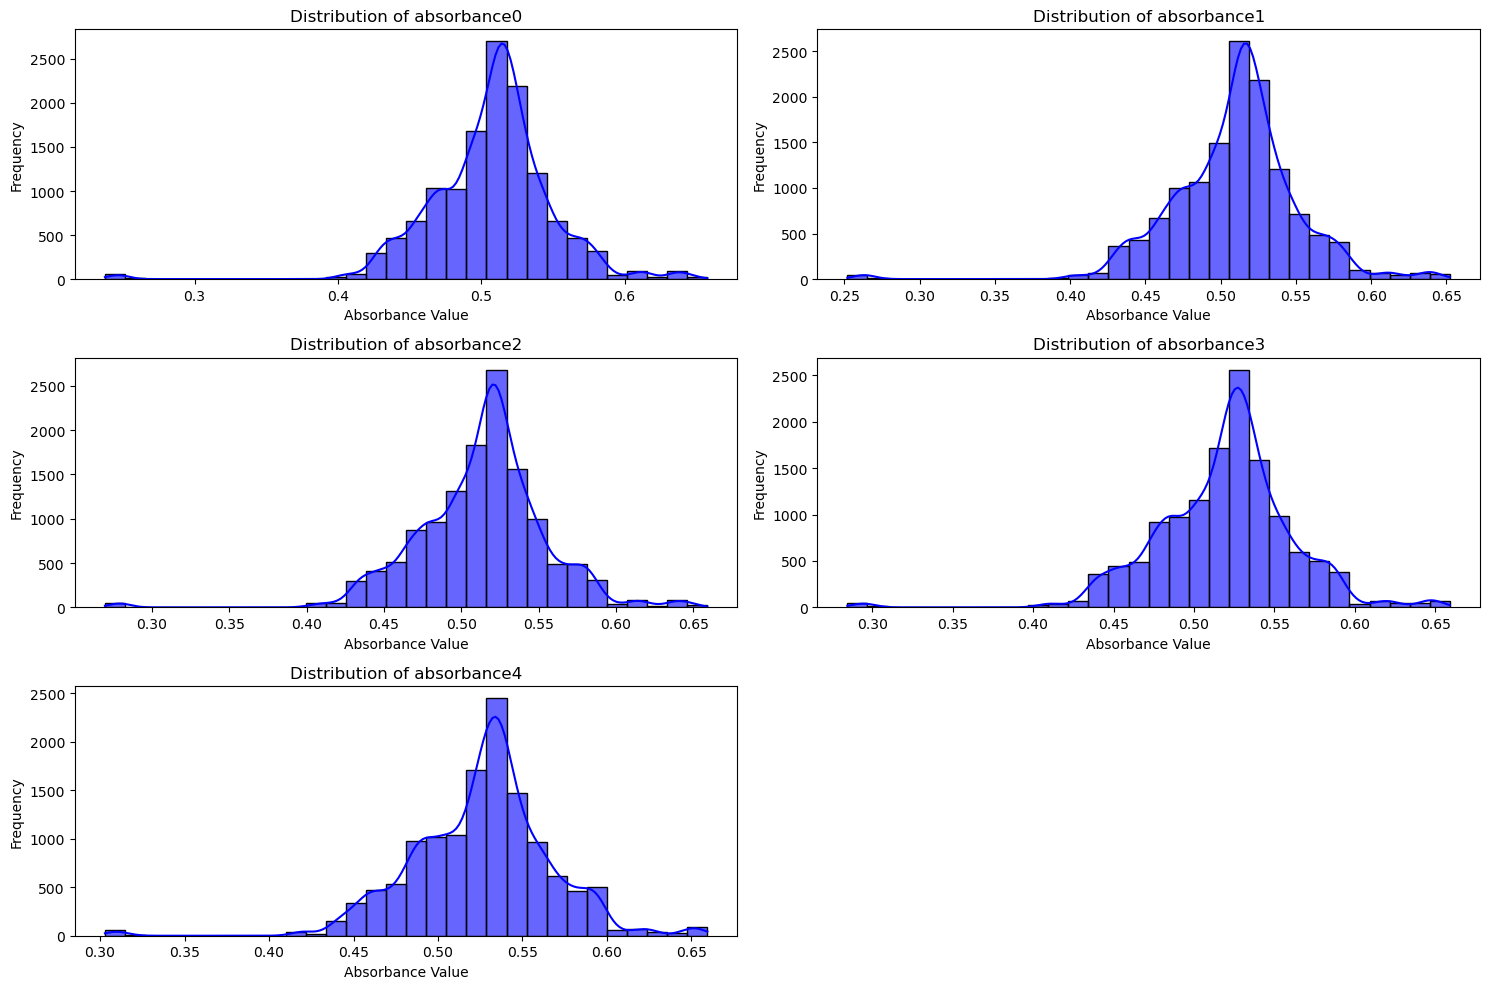

In [44]:
# A subset of NIR features for visualization
nir_columns = [col for col in features.columns[:5]]
selected_data = features[nir_columns]

# Histograms and KDE for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(nir_columns):
    plt.subplot(3, 2, i + 1)  
    sns.histplot(selected_data[col], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Absorbance Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [35]:
from scipy.signal import savgol_filter
def apply_savitzky_golay(data, window_length=11, polyorder=2):
    """
    Applies Savitzky-Golay smoothing to each feature (wavelength).
    
    Parameters:
    - data: Pandas DataFrame (rows = samples, columns = spectral features)
    - window_length: Odd integer, the length of the filter window.
    - polyorder: Integer, the order of the polynomial to fit.
    
    Returns:
    - smoothed_data: Pandas DataFrame with smoothed features.
    """
    smoothed_data = data.apply(
        lambda x: savgol_filter(x, window_length=window_length, polyorder=polyorder), axis=0
    )
    return smoothed_data

In [36]:
def apply_snv(data):
    """
    Applies Standard Normal Variate (SNV) preprocessing to the data.
    
    Parameters:
    - data: Pandas DataFrame (rows = samples, columns = spectral features)
    
    Returns:
    - snv_data: Pandas DataFrame with SNV applied.
    """
    snv_data = data.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
    return snv_data


In [37]:
original_spectral_data = train.loc[:, 'absorbance0':'absorbance169']

# Apply Savitzky-Golay smoothing
smoothed_data = apply_savitzky_golay(original_spectral_data, window_length=11, polyorder=2)

# Apply Standard Normal Variate 
preprocessed_data = apply_snv(smoothed_data)

# Replace the original spectral data in train_data with preprocessed data
train.loc[:, 'absorbance0':'absorbance169'] = preprocessed_data

In [38]:
test_spectrum = test.loc[:, 'absorbance0':'absorbance169']

#Savitzky-Golay smoothing
test_smoothed = apply_savitzky_golay(test_spectrum, window_length=11, polyorder=2)

#Standard Normal Variate 
test_preprocessed = apply_snv(test_smoothed)

test.loc[:, 'absorbance0':'absorbance169'] = test_preprocessed

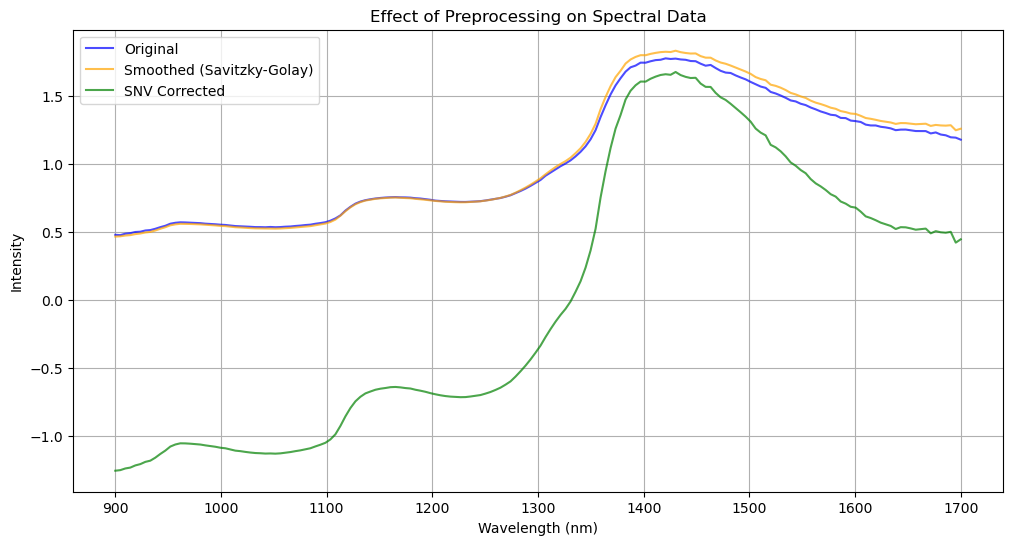

In [70]:
# Define wavelengths (170 values from 900 nm to 1700 nm)
wavelengths = np.linspace(900, 1700, 170)

# Plot original vs smoothed vs SNV-corrected for a single sample
sample_id = 0  
original = original_spectral_data.iloc[sample_id, :].values
smoothed = smoothed_data.iloc[sample_id, :].values
snv_corrected = preprocessed_data.iloc[sample_id, :].values

plt.figure(figsize=(12, 6))
plt.plot(wavelengths, original, label="Original", color="blue", alpha=0.7)
plt.plot(wavelengths, smoothed, label="Smoothed (Savitzky-Golay)", color="orange", alpha=0.7)
plt.plot(wavelengths, snv_corrected, label="SNV Corrected", color="green", alpha=0.7)
plt.title("Effect of Preprocessing on Spectral Data")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.legend()
plt.grid(True)
plt.show()


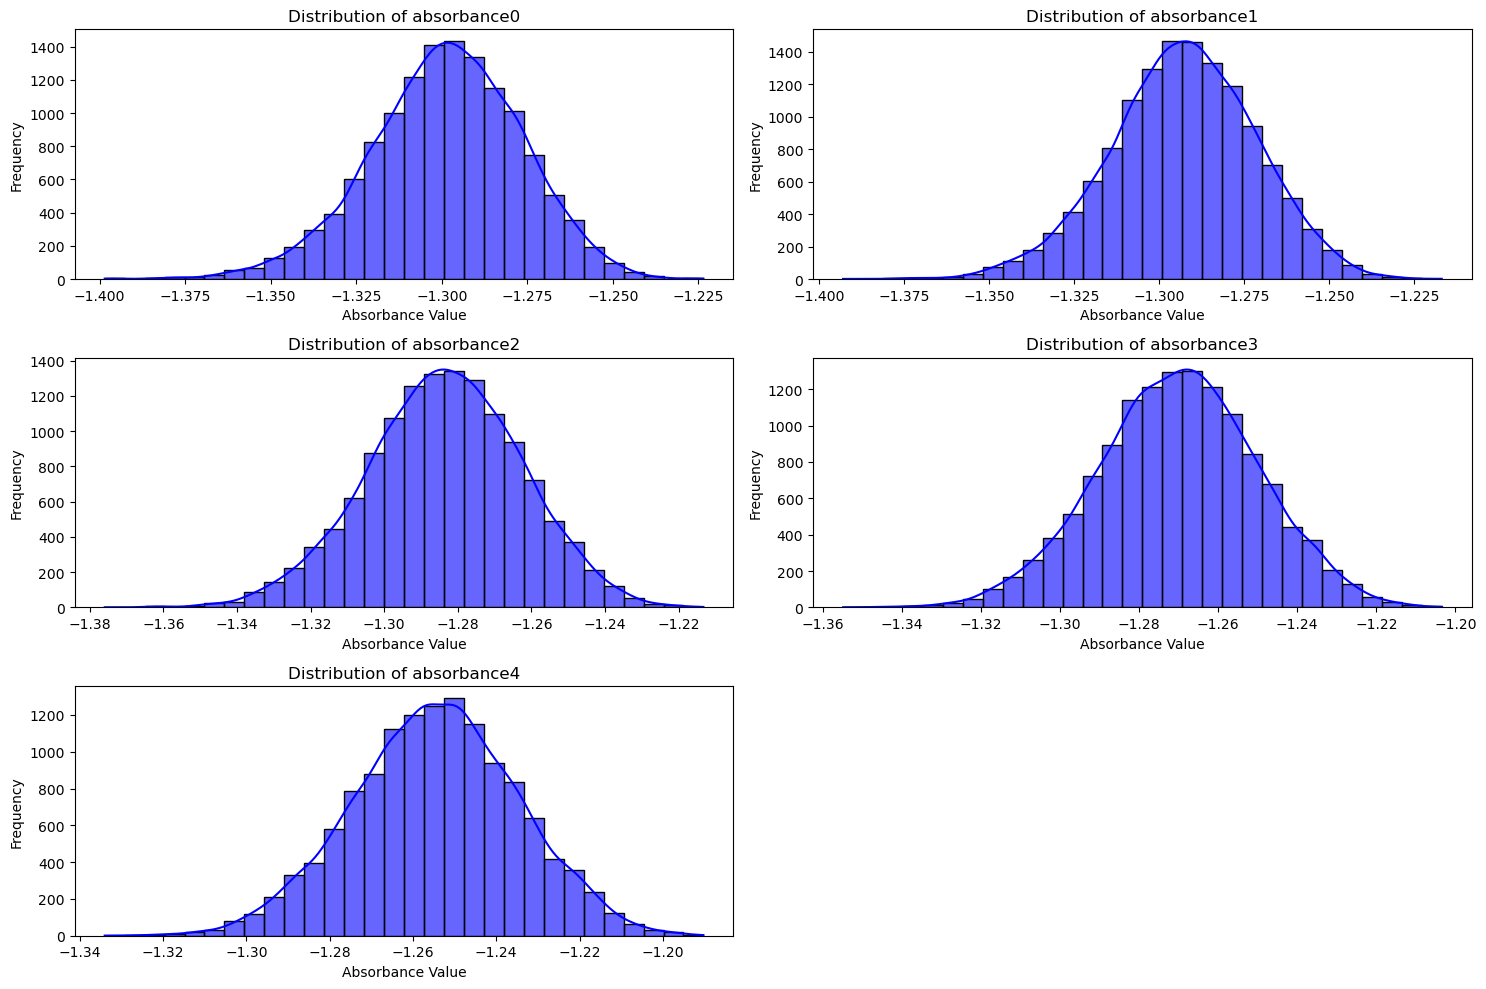

In [71]:
# A subset of ptrprocessed NIR features for visualization
nir_columns = [col for col in features.columns[:5]]
selected_data = train[nir_columns]

# Histograms and KDE for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(nir_columns):
    plt.subplot(3, 2, i + 1)  
    sns.histplot(selected_data[col], kde=True, bins=30, color='blue', alpha=0.6)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Absorbance Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [72]:
corr_matrix = train.loc[:, features.columns].corr()
corr_matrix

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
absorbance0,1.000000,0.975745,0.972377,0.958685,0.935592,0.909039,0.905773,0.915405,0.919919,0.921974,...,-0.634290,-0.502768,-0.350590,-0.257587,-0.204381,-0.190870,-0.179909,-0.149257,-0.014601,-0.016864
absorbance1,0.975745,1.000000,0.978062,0.971165,0.951680,0.928050,0.925475,0.933793,0.938704,0.939582,...,-0.664857,-0.538815,-0.391236,-0.301020,-0.247616,-0.232609,-0.222899,-0.188570,-0.015103,-0.007678
absorbance2,0.972377,0.978062,1.000000,0.977826,0.961778,0.942681,0.942948,0.951824,0.955803,0.955142,...,-0.681439,-0.554966,-0.406755,-0.316347,-0.264495,-0.250146,-0.238058,-0.208346,-0.017809,-0.002278
absorbance3,0.958685,0.971165,0.977826,1.000000,0.980231,0.962705,0.960481,0.965290,0.966615,0.968650,...,-0.730536,-0.619617,-0.485501,-0.399710,-0.349100,-0.333893,-0.317767,-0.289448,-0.017366,0.008134
absorbance4,0.935592,0.951680,0.961778,0.980231,1.000000,0.983068,0.978904,0.975455,0.971437,0.969055,...,-0.774429,-0.688540,-0.569589,-0.490558,-0.442889,-0.426116,-0.406507,-0.372288,-0.018459,0.011471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
absorbance167,-0.190870,-0.232609,-0.250146,-0.333893,-0.426116,-0.472428,-0.448600,-0.387924,-0.355014,-0.349152,...,0.687868,0.821051,0.904415,0.932445,0.937412,1.000000,0.910668,0.879493,0.016304,-0.043620
absorbance168,-0.179909,-0.222899,-0.238058,-0.317767,-0.406507,-0.447969,-0.424697,-0.365754,-0.336679,-0.332495,...,0.663939,0.795618,0.874830,0.903563,0.910828,0.910668,1.000000,0.865737,0.018510,-0.045848
absorbance169,-0.149257,-0.188570,-0.208346,-0.289448,-0.372288,-0.409071,-0.388526,-0.334580,-0.303056,-0.306374,...,0.633589,0.755474,0.834799,0.862828,0.876134,0.879493,0.865737,1.000000,0.015805,-0.041053
temperature,-0.014601,-0.015103,-0.017809,-0.017366,-0.018459,-0.018611,-0.017098,-0.020106,-0.022311,-0.022053,...,0.034365,0.028440,0.021823,0.019390,0.015923,0.016304,0.018510,0.015805,1.000000,-0.273798


In [13]:
train.to_csv("train_preprocessed.csv", index = False)
test.to_csv("test_preprocessed.csv", index = False)

In [93]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

#only the spectral features for Boruta
X_spectral = X.iloc[:, :-2]
y_target = y['hdl_cholesterol_human']  #one target variable for Boruta

# Use RandomForestClassifier as the base estimator
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)

# Initialize Boruta
boruta_selector = BorutaPy(estimator=rf, n_estimators='auto', random_state=42)

# Fit Boruta on the data
boruta_selector.fit(X_spectral.values, y_target.values)

# Get the selected features
selected_features = X_spectral.columns[boruta_selector.support_]
print("Selected features by Boruta:")
print(selected_features)

# Reduce the dataset to the selected features
X_boruta = X_spectral[selected_features]


Selected features by Boruta:
Index(['absorbance0', 'absorbance19', 'absorbance59', 'absorbance88',
       'absorbance93', 'absorbance94', 'absorbance95', 'absorbance97',
       'absorbance98', 'absorbance126', 'absorbance130', 'absorbance138',
       'absorbance141'],
      dtype='object')


In [100]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use Random Forest as the estimator for RFE
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rfe = RFE(estimator=rf, n_features_to_select=20)  # Select top 20 features
rfe.fit(X_spectral, y_target)

# Get the selected features
rfe_selected = X_spectral.columns[rfe.support_]
print("Selected features by RFE:")
print(rfe_selected)

# Reduce the dataset to the selected features
X_rfe = X_spectral[rfe_selected]


Selected features by RFE:
Index(['absorbance0', 'absorbance45', 'absorbance46', 'absorbance52',
       'absorbance59', 'absorbance61', 'absorbance68', 'absorbance95',
       'absorbance97', 'absorbance124', 'absorbance125', 'absorbance126',
       'absorbance127', 'absorbance128', 'absorbance129', 'absorbance130',
       'absorbance131', 'absorbance133', 'absorbance168', 'absorbance169'],
      dtype='object')


In [101]:
correlation_matrix = X_spectral.corr()

# Define a correlation threshold (e.g., 0.85)
threshold = 0.85

# Identify features to keep (those below the threshold)
filtered_features = []
for i in range(len(correlation_matrix)):
    correlated = np.where(correlation_matrix.iloc[i, :].abs() > threshold)[0]
    if len(correlated) == 1:  # If a feature is not highly correlated with others
        filtered_features.append(correlation_matrix.index[i])

print("Filtered features by CFS:")
print(filtered_features)

# Reduce the dataset to the filtered features
X_cfs = X_spectral[filtered_features]


Filtered features by CFS:
['absorbance125', 'absorbance126', 'absorbance127', 'absorbance128', 'absorbance129', 'absorbance130', 'absorbance131']


In [102]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_spectral, y_target)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index = X_spectral.columns)
important_features = feature_importances.nlargest(20).index  # Top 20 features
print("Selected features by Random Forest:")
print(important_features)

# Reduce the dataset to the important features
X_rf = X_spectral[important_features]


Selected features by Random Forest:
Index(['absorbance126', 'absorbance127', 'absorbance125', 'absorbance97',
       'absorbance128', 'absorbance130', 'absorbance46', 'absorbance95',
       'absorbance131', 'absorbance129', 'absorbance132', 'absorbance124',
       'absorbance59', 'absorbance60', 'absorbance133', 'absorbance134',
       'absorbance44', 'absorbance123', 'absorbance168', 'absorbance45'],
      dtype='object')


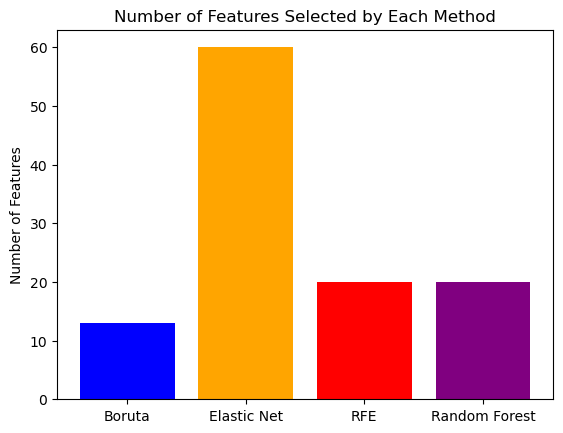

In [104]:
methods = ['Boruta', 'RFE', 'Random Forest']
num_features = [
    len(X_boruta.columns),
    len(X_rfe.columns),
    len(X_rf.columns)
]

# Bar plot for comparison
import matplotlib.pyplot as plt

plt.bar(methods, num_features, color=['blue', 'orange', 'red', 'purple'])
plt.title("Number of Features Selected by Each Method")
plt.ylabel("Number of Features")
plt.show()


In [107]:
# Create sets of selected features
features_boruta = set(X_boruta.columns)
features_rfe = set(X_rfe.columns)
features_rf = set(X_rf.columns)

# Find common features across all sets
common_features = features_boruta  & features_rfe & features_rf
print(f"Common features across all methods: {common_features}")


Common features across all methods: {'absorbance95', 'absorbance130', 'absorbance97', 'absorbance126', 'absorbance59'}


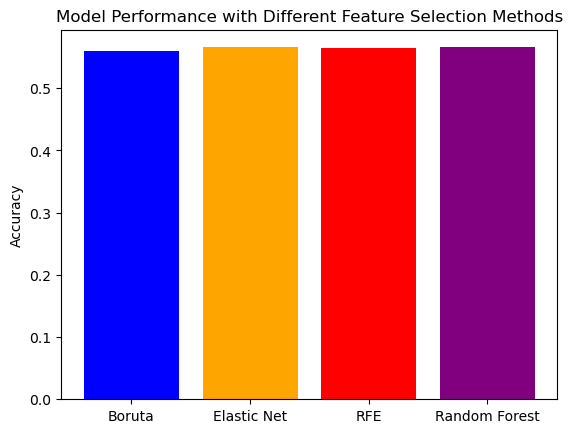

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define model
model = RandomForestClassifier(random_state=42)

# Evaluate model performance on each feature set
methods = ['Boruta', 'RFE', 'Random Forest']
datasets = [X_boruta, X_rfe, X_rf]
scores = []

for X_selected in datasets:
    score = cross_val_score(model, X_selected, y_target, cv=5, scoring='accuracy') 
    scores.append(score.mean())

# Bar plot for comparison
plt.bar(methods, scores, color=['blue', 'red', 'purple'])
plt.title("Model Performance with Different Feature Selection Methods")
plt.ylabel("Accuracy")
plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode all targets
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()

y_combined = pd.DataFrame({
    'Target1': label_encoder1.fit_transform(y_train[:, 0]),
    'Target2': label_encoder2.fit_transform(y_train[:, 1]),
    'Target3': label_encoder3.fit_transform(y_train[:, 2])
})


In [43]:
import pymrmr

# Initialize a dictionary to store selected features for each target
selected_features = {}

# Iterate over targets
for target in ['Target1', 'Target2', 'Target3']:
    print(f"Processing {target}...")

    # Combine target with feature data
    data_for_mrmr = pd.concat(
        [y_combined[target], train.drop(columns=['Reading_ID', 'cholesterol_ldl_human', 'hemoglobin(hgb)_human', 'hdl_cholesterol_human'])],
        axis=1
    )

    # Apply mRMR
    selected_features[target] = pymrmr.mRMR(data_for_mrmr, 'MIQ', 10)  # Select top 10 features
    print(f"Selected Features for {target}: {selected_features[target]}")


Processing Target1...
Selected Features for Target1: ['humidity', 'absorbance135', 'absorbance139', 'temperature', 'absorbance44', 'absorbance98', 'absorbance136', 'absorbance137', 'absorbance138', 'absorbance117']
Processing Target2...
Selected Features for Target2: ['humidity', 'temperature', 'absorbance138', 'absorbance135', 'absorbance44', 'absorbance98', 'absorbance139', 'absorbance137', 'absorbance136', 'absorbance117']
Processing Target3...
Selected Features for Target3: ['humidity', 'absorbance139', 'absorbance44', 'temperature', 'absorbance98', 'absorbance135', 'absorbance138', 'absorbance137', 'absorbance136', 'absorbance116']


In [44]:
# Save selected features to a JSON file
with open("selected_features.json", "w") as file:
    json.dump(selected_features, file)
print("Selected features saved to selected_features.json")

Selected features saved to selected_features.json


In [46]:
X_boruta = preprocessed_data.loc[:, ['absorbance0', 'absorbance19', 'absorbance59', 'absorbance88',
       'absorbance93', 'absorbance94', 'absorbance95', 'absorbance97',
       'absorbance98', 'absorbance126', 'absorbance130', 'absorbance138',
       'absorbance141']]

In [48]:
from sklearn.preprocessing import StandardScaler

# Normalize X_boruta
scaler = StandardScaler()
X_boruta_scaled = scaler.fit_transform(X_boruta)
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_boruta_pca = pca.fit_transform(X_boruta_scaled)

# Print the number of components retained
print(f"Number of components to retain 95% variance: {pca.n_components_}")


Number of components to retain 95% variance: 5


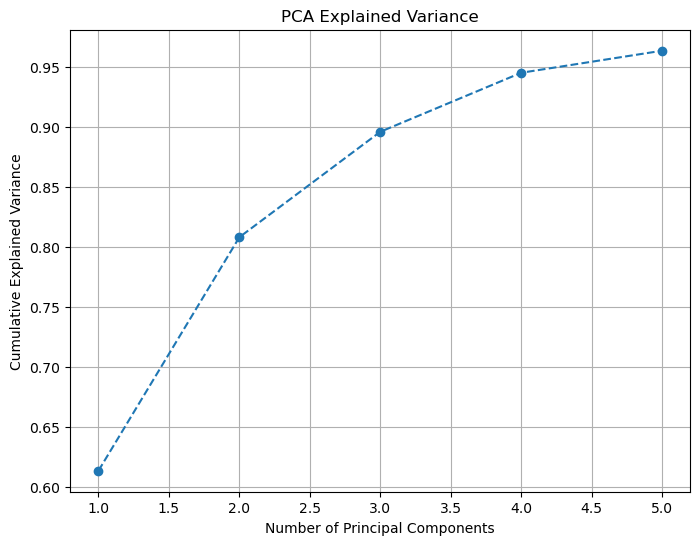

In [49]:
import matplotlib.pyplot as plt

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
target_columns = ['hdl_cholesterol_human', 'hemoglobin(hgb)_human', 'cholesterol_ldl_human']

encoders = {}
for col in target_columns:
    encoder = LabelEncoder()
    targets[col] = encoder.fit_transform(targets[col])
    encoders[col] = encoder

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
# Perform cross-validation
scores = cross_val_score(model, X_boruta_pca, targets.iloc[:, 0], cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-Validation Accuracy: 0.5442 ± 0.0027


In [40]:
cholesterol_signature_df = pd.read_csv(cholesterol_signature)
hemoglobin_signature_df = pd.read_csv(hemoglobin_signature)
glucose_signature_df = pd.read_csv(glucose_signature)
skin_fat_blood_signature_df = pd.read_csv(skin_fat_blood_signature)

In [44]:
wave_len_info  = cholesterol_signature_df['Cholesterol'].values[1:].tolist()
len(wave_len_info)

170

In [45]:
waves = []

for x in range(148):
  waves.append(float(wave_len_info[x]))

waves = np.array(waves, dtype = float)
waves.shape

(148,)

In [46]:
waves_sig = []

for x in range(170):
  waves_sig.append(float(wave_len_info[x]))

waves_sig = np.array(waves_sig, dtype = float)
waves_sig.shape

(170,)

In [47]:
mask_wls_sg = (waves_sig >= 950) & (waves_sig <= 1350)
clipped_waves_sig = waves_sig[mask_wls_sg]
clipped_waves_sig.shape

(85,)

In [48]:
mask_wls = (waves >= 950) & (waves <= 1350)
clipped_waves = waves[mask_wls]
clipped_waves.shape

(85,)

In [49]:
waves_clipped = clipped_waves.copy()
cols = [str(c) for c in clipped_waves]

In [63]:
train_abs = train[[f'absorbance{i}' for i in range(148)]]
train_abs.columns = wave_len_info[:148]

test_abs = test[[f'absorbance{i}' for i in range(148)]]
test_abs.columns = wave_len_info[:148]

In [64]:
test.drop([f'absorbance{i}' for i in range(148)], axis=1,  inplace=True)
train.drop([f'absorbance{i}' for i in range(148)], axis=1, inplace=True)

In [65]:
train = pd.concat([train_abs, train], axis=1)
test =  pd.concat([test_abs,  test], axis=1)

In [66]:
train.head()

,900,904.733704,909.467468,914.201172,918.934937,923.66864,928.402344,933.136108,937.869812,942.603577,...,absorbance168,absorbance169,id,std,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,donation_id
0,0.520883,0.528200,0.529795,0.537382,0.540265,0.546260,0.550882,0.558865,0.571352,0.585775,...,1.319344,1.278294,0,0.0026,39.27,44.17,low,ok,high,2250
1,0.529109,0.534852,0.541075,0.544269,0.546594,0.555183,0.561367,0.567637,0.582427,0.595801,...,1.282723,1.267465,1,0.0026,39.39,44.09,low,ok,high,2250
2,0.528434,0.532036,0.540413,0.541964,0.549347,0.555902,0.561458,0.567824,0.579568,0.593048,...,1.287730,1.266464,2,0.0026,39.50,44.00,low,ok,high,2250
3,0.530528,0.531880,0.539558,0.542433,0.549097,0.556224,0.561398,0.566963,0.577525,0.591982,...,1.314408,1.342224,3,0.0026,39.60,43.89,low,ok,high,2250
4,0.527530,0.536424,0.538207,0.541504,0.550546,0.555203,0.560394,0.567352,0.579438,0.592049,...,1.268710,1.216146,4,0.0026,39.70,43.83,low,ok,high,2250


In [50]:
cholesterol_signature_df.rename({'Cholesterol' : 'wavelength', 'Unnamed: 1':'absorbance_coef'},axis=1, inplace=True)
hemoglobin_signature_df.rename({'deox_hb' : 'wavelength', 'Unnamed: 1' :'deoxy_absorbance_coef'},axis=1, inplace=True)
hemoglobin_signature_df.rename({'oxy_hb' : 'wavelength', 'Unnamed: 4' :'oxy_absorbance_coef'},axis=1, inplace=True)
glucose_signature_df.rename({'Glucose' : 'wavelength', 'Unnamed: 1':'absorbance_coef'},axis=1, inplace=True)
skin_fat_blood_signature_df.rename({'Skin' : 'skin_wavelength', 'Unnamed: 1':'skin_absorbance_coef'},axis=1, inplace=True)
skin_fat_blood_signature_df.rename({'Fat' : 'fat_wavelength', 'Unnamed: 4':'fat_absorbance_coef'},axis=1, inplace=True)
skin_fat_blood_signature_df.rename({'Deoxy' : 'deoxy_wavelength', 'Unnamed: 7':'deoxy_absorbance_coef'},axis=1, inplace=True)

In [51]:
cholesterol_signature_df.drop(cholesterol_signature_df.index[0], inplace=True)
hemoglobin_signature_df.drop(hemoglobin_signature_df.index[0], inplace=True)
glucose_signature_df.drop(glucose_signature_df.index[0],inplace=True)
skin_fat_blood_signature_df.drop(skin_fat_blood_signature_df.index[0], inplace=True)

In [56]:
cholesterol_sig = cholesterol_signature_df['absorbance_coef'].values[mask_wls_sg]
deoxy_hemoglobin_sig =  hemoglobin_signature_df['deoxy_absorbance_coef'].values[mask_wls]
oxy_hemoglobin_sig =  hemoglobin_signature_df['oxy_absorbance_coef'].values[mask_wls]
glucose_sig    = glucose_signature_df['absorbance_coef'].values[mask_wls_sg]
skin_sig = skin_fat_blood_signature_df['skin_absorbance_coef'].values[mask_wls_sg]
fat_sig = skin_fat_blood_signature_df['fat_absorbance_coef'].values[mask_wls_sg]
deoxy_sig = skin_fat_blood_signature_df['deoxy_absorbance_coef'].values[mask_wls_sg]

In [57]:
cholesterol_sig.shape, deoxy_hemoglobin_sig.shape, oxy_hemoglobin_sig.shape, glucose_sig.shape, skin_sig.shape, skin_sig.shape, fat_sig.shape, deoxy_sig.shape

((85,), (85,), (85,), (85,), (85,), (85,), (85,), (85,))

In [58]:
cholesterol_signature_df

,wavelength,absorbance_coef
1,900,0.176311646
2,904.733704,0.1760358007
3,909.467468,0.1757603869
4,914.201172,0.1754854041
5,918.934937,0.1752108514
...,...,...
166,1681.065063,7.757396681
167,1685.798828,8.629109896
168,1690.532593,9.692950614
169,1695.266235,10.92662403


In [67]:
train_spectra = train[cols].values
test_spectra = test[cols].values

In [68]:
cholesterol_sig = np.array(cholesterol_sig, dtype = float)
deoxy_hemoglobin_sig = np.array(deoxy_hemoglobin_sig, dtype = float)
oxy_hemoglobin_sig = np.array(oxy_hemoglobin_sig, dtype = float)
glucose_sig    = np.array(glucose_sig, dtype = float)
skin_sig = np.array(skin_sig, dtype = float)
fat_sig = np.array(fat_sig, dtype = float)
deoxy_sig = np.array(deoxy_sig, dtype = float)

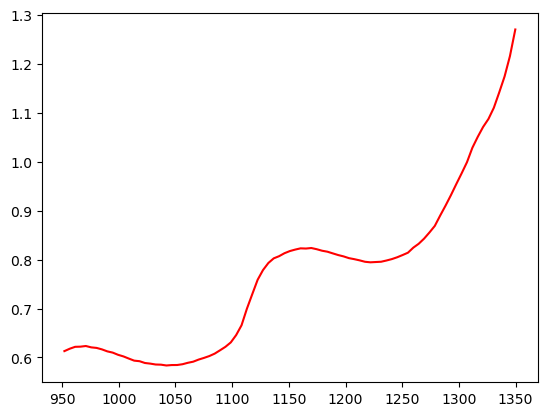

In [69]:
num_plots = 1

for x in range(num_plots):
  plt.plot(clipped_waves, train_spectra[x, :], 'r')